(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

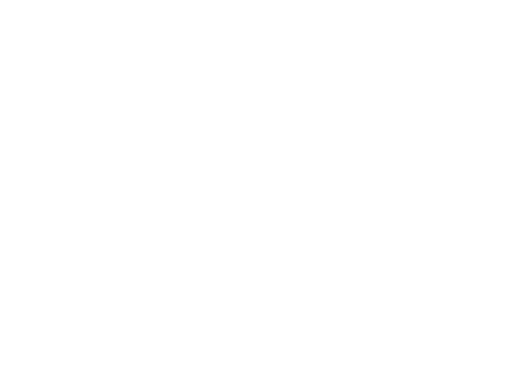

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


In [21]:

df = pd.read_excel(r'.\data\Forexdata3.xlsx')
df['Date'] =pd.to_datetime(df['Date'])
# df['Date'] = df['Date'].apply(lambda x: x.strftime('%m/%d/%Y'))


In [5]:
df.head()


,Futures,Date,long,short
0,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-12-01,28702,49945
1,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-24,31529,48375
2,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-17,26205,46564
3,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-10,25962,47311
4,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-03,21549,42235


In [6]:
df.groupby(['Date','Futures',]).long.mean()

Date        Futures                                             
2020-01-07  AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE          52063.0
            BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE     67403.0
            CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE            68756.0
            EURO FX - CHICAGO MERCANTILE EXCHANGE                   164813.0
            JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE               47846.0
                                                                      ...   
2023-11-14  EURO FX - CHICAGO MERCANTILE EXCHANGE                   221190.0
            JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE               27772.0
            NEW ZEALAND DOLLAR - CHICAGO MERCANTILE EXCHANGE          8818.0
            SWISS FRANC - CHICAGO MERCANTILE EXCHANGE                 5515.0
            U.S. DOLLAR INDEX - ICE FUTURES U.S.                     27271.0
Name: long, Length: 1448, dtype: float64

In [7]:
df['long_x']=df.groupby(['Futures'])['long'].shift(1)

In [8]:
df.head()

,Futures,Date,long,short,long_x
0,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-12-01,28702,49945,NaN
1,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-24,31529,48375,28702.0
2,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-17,26205,46564,31529.0
3,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-10,25962,47311,26205.0
4,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2020-11-03,21549,42235,25962.0


In [111]:
df2 = df[['Futures','Date','long']]
ax.table(cellText=df2.values, colLabels=df2.columns, loc='center')

fig.tight_layout()

plt.show()

df2 = df2.sort_values(by = ['Futures','Date'], ascending=[True,False])
df2['long_x']=df2.groupby(['Futures'])['long'].shift(-1)

# df = df.sort_values(by = ['Futures','Date'], ascending=[True,False])

C:\Users\oduwa\AppData\Local\Temp\ipykernel_12704\3374695958.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


In [29]:
df = df.sort_values(by = ['Futures','Date'], ascending=[True,False])

In [11]:
df['Change_in_long'] = df['long'] - df.groupby(['Futures'])['long'].shift(-1)

In [12]:
df['Change_in_short'] = df['short'] - df.groupby(['Futures'])['short'].shift(-1)

In [13]:
df['Percentage_of_long'] = ((df['long']/ (df['long'] + df['short']) ) * 100).round()
df['Percentage_of_long'] = df['Percentage_of_long'].astype(str) +'%'


In [14]:
df['Percentage_of_short'] = ((df['short']/ (df['long'] + df['short'])) * 100).round()
df['Percentage_of_short'] = df['Percentage_of_short'].astype(str) +'%'


In [15]:
df['Net_Position'] = df['long'] - df['short']

In [16]:
df.head(300)

,Futures,Date,long,short,long_x,Change_in_long,Change_in_short,Percentage_of_long,Percentage_of_short,Net_Position
1402,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-11-14,32728,103684,25644.0,-1321.0,4072.0,24.0%,76.0%,-70956
1403,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-11-07,34049,99612,32728.0,1244.0,-8303.0,25.0%,75.0%,-65563
1404,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-31,32805,107915,34049.0,4787.0,-3184.0,23.0%,77.0%,-75110
1405,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-24,28018,111099,32805.0,-3547.0,-1205.0,20.0%,80.0%,-83081
1406,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-17,31565,112304,28018.0,-262.0,3900.0,22.0%,78.0%,-80739
1407,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-10,31827,108404,31565.0,-7638.0,-13048.0,23.0%,77.0%,-76577
1408,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-03,39465,121452,31827.0,3361.0,-1467.0,25.0%,75.0%,-81987
1409,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-26,36104,122919,39465.0,-676.0,-10807.0,23.0%,77.0%,-86815
1410,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-19,36780,133726,36104.0,-10529.0,6884.0,22.0%,78.0%,-96946
1411,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-12,47309,126842,36780.0,-6723.0,-10727.0,27.0%,73.0%,-79533


In [79]:
df2.head(300)

,Futures,Date,long,long_x
1402,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-11-14,32728,34049.0
1403,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-11-07,34049,32805.0
1404,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-31,32805,28018.0
1405,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-24,28018,31565.0
1406,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-17,31565,31827.0
1407,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-10,31827,39465.0
1408,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-03,39465,36104.0
1409,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-26,36104,36780.0
1410,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-19,36780,47309.0
1411,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-12,47309,54032.0


In [80]:
df2['Change_in_long'] = df2['long'] - df2.groupby(['Futures'])['long'].shift(-1)

In [81]:
df2.head(300)

,Futures,Date,long,long_x,Change_in_long
1402,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-11-14,32728,34049.0,-1321.0
1403,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-11-07,34049,32805.0,1244.0
1404,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-31,32805,28018.0,4787.0
1405,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-24,28018,31565.0,-3547.0
1406,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-17,31565,31827.0,-262.0
1407,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-10,31827,39465.0,-7638.0
1408,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-10-03,39465,36104.0,3361.0
1409,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-26,36104,36780.0,-676.0
1410,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-19,36780,47309.0,-10529.0
1411,AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE,2023-09-12,47309,54032.0,-6723.0


In [112]:
df2.Futures.unique()

array(['AUSTRALIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE',
       'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE',
       'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE',
       'EURO FX - CHICAGO MERCANTILE EXCHANGE',
       'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE',
       'NEW ZEALAND DOLLAR - CHICAGO MERCANTILE EXCHANGE',
       'SWISS FRANC - CHICAGO MERCANTILE EXCHANGE',
       'U.S. DOLLAR INDEX - ICE FUTURES U.S.'], dtype=object)

In [30]:
    df3= df[df['Futures']== 'U.S. DOLLAR INDEX - ICE FUTURES U.S.']   
df3.head()

,Futures,Date,long,short
1264,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-11-14,27271,7537
1265,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-11-07,27866,8395
1266,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-31,27571,8586
1267,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-24,28130,8459
1268,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-17,28534,9367


In [31]:
# df3['year'] = df3['year'] = pd.DatetimeIndex(df3['Date']).year
# df['date_column'] = pd.to_datetime(df['date_column'])
df3['Month'] = df3['Date'].dt.month
df3['Year'] = df3['Date'].dt.year
df3.head()

C:\Users\oduwa\AppData\Local\Temp\ipykernel_4228\1842336960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df3['Date'].dt.month
C:\Users\oduwa\AppData\Local\Temp\ipykernel_4228\1842336960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = df3['Date'].dt.year


,Futures,Date,long,short,Month,Year
1264,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-11-14,27271,7537,11,2023
1265,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-11-07,27866,8395,11,2023
1266,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-31,27571,8586,10,2023
1267,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-24,28130,8459,10,2023
1268,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-17,28534,9367,10,2023


In [32]:
df3.head()

,Futures,Date,long,short,Month,Year
1264,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-11-14,27271,7537,11,2023
1265,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-11-07,27866,8395,11,2023
1266,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-31,27571,8586,10,2023
1267,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-24,28130,8459,10,2023
1268,U.S. DOLLAR INDEX - ICE FUTURES U.S.,2023-10-17,28534,9367,10,2023


Text(0.5, 1.0, 'long over date')

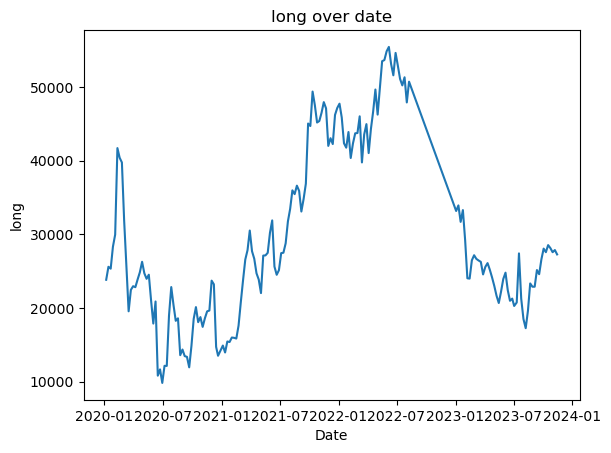

In [119]:
plt.plot(df3['Date'], df3['long'])
plt.xlabel('Date')
plt.ylabel('long')
plt.title('long over date')


In [134]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df3.Date
column0 = df3['long']
column1 = df3['short']

In [135]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

# rows = len(index)
# rows

181

<BarContainer object of 181 artists>

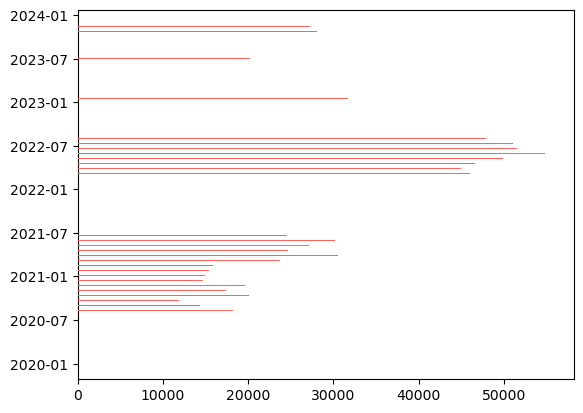

In [141]:
        
plt.barh(index, column0, align='center', color=color_red, zorder=10)
# axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
# axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

        
# axes[0].set(yticks=df3.index, yticklabels=df3.index)
# axes[0].yaxis.tick_left()
# axes[0].tick_params(axis='y', colors='white') # tick color
    